## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [258]:
# for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

## Importing Libraries and Understanding the Data

In [214]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [216]:
df.shape

(730, 16)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [218]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot:>

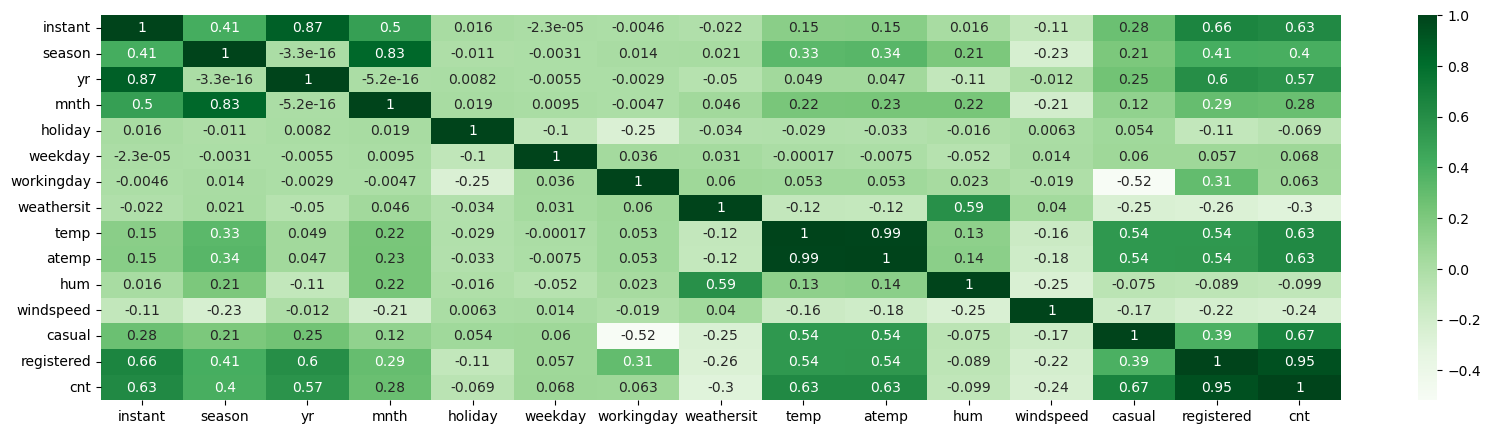

In [219]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [220]:
#Finding null values

In [221]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [222]:
# There are no null values present in the dataset

In [223]:
# sns.pairplot(df)

In [224]:
df.drop_duplicates(subset=None, inplace=True)

In [225]:
df.shape

(730, 16)

## Data Cleaning

In [226]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [227]:
bike_new=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [228]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [229]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [230]:
# changing the name for better clearity 
bike_new.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)

In [231]:
season={1:"spring",2:"summer",3:"fall",4:'winter'}

bike_new.season=[season[item] for item in bike_new.season]

In [232]:
weather={1:"clear",2:"mist & cloudy",3:"light rain & snow",4:'heavy rain & snow'}

bike_new.weathersit=[weather[item] for item in bike_new.weathersit]

In [233]:
month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}

bike_new.month=[month_cat[item] for item in bike_new.month]

In [234]:
wkday_cat={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}

bike_new.weekday=[wkday_cat[item] for item in bike_new.weekday]

In [235]:
yr_cat={0: '2018',1: '2019'}

bike_new.year=[yr_cat[item] for item in bike_new.year]

In [236]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Saturday,0,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# EDA

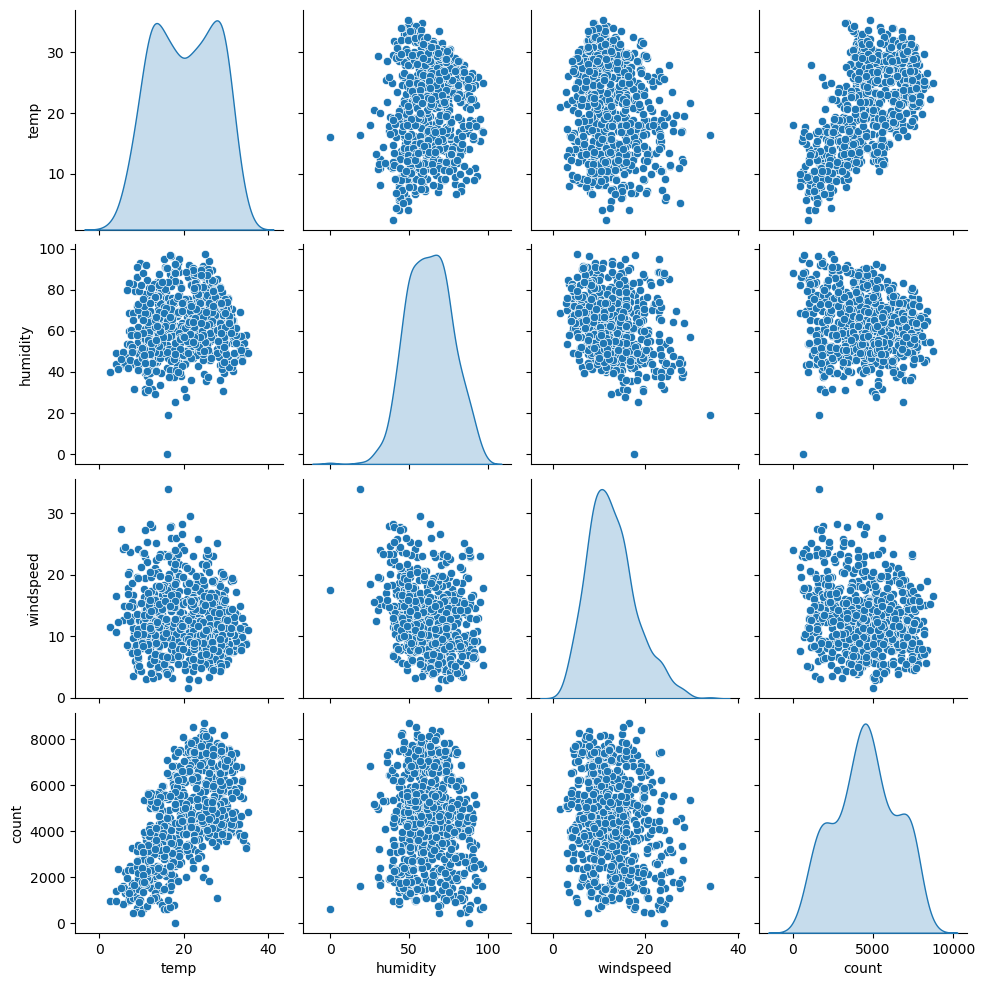

In [237]:
bike_num=bike_new[[ 'temp','humidity', 'windspeed','count']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

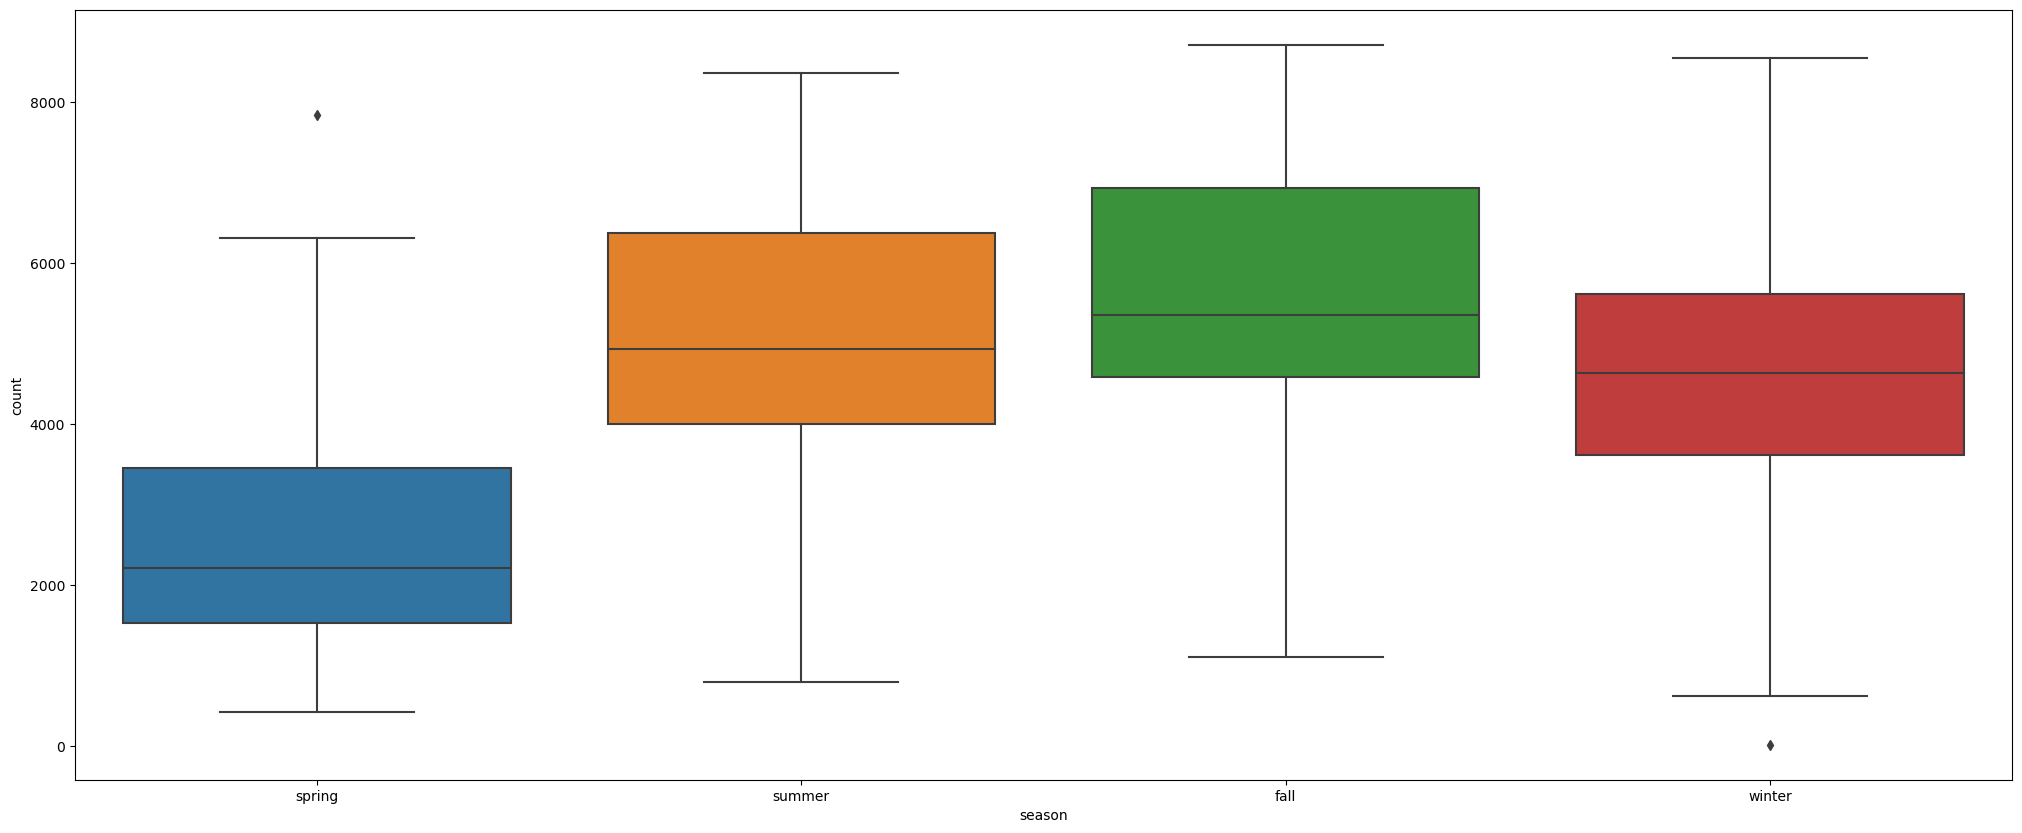

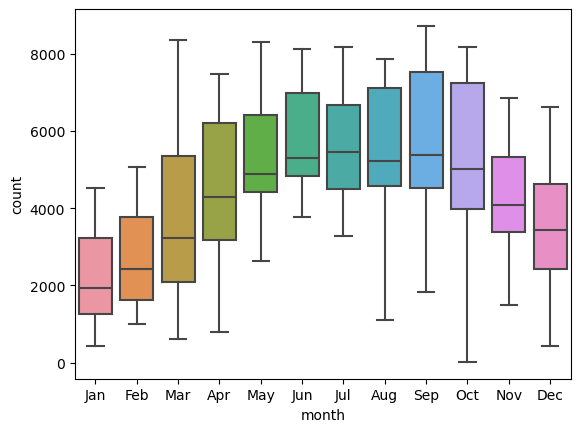

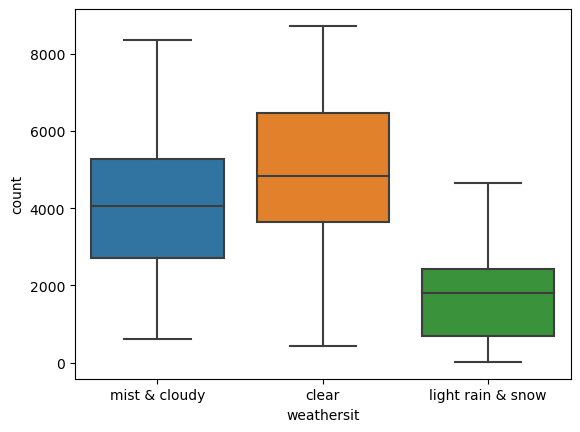

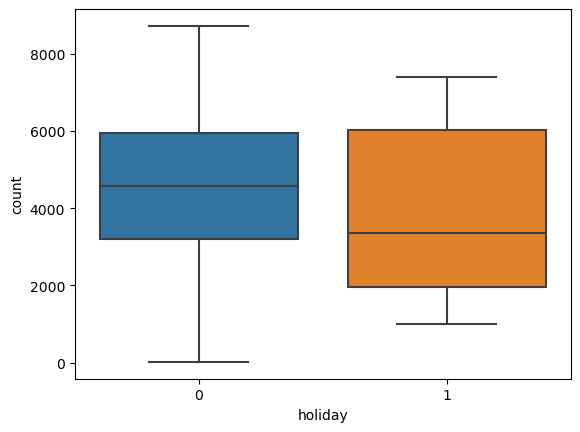

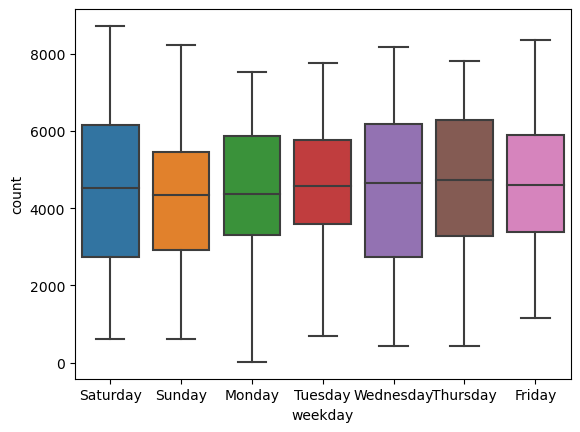

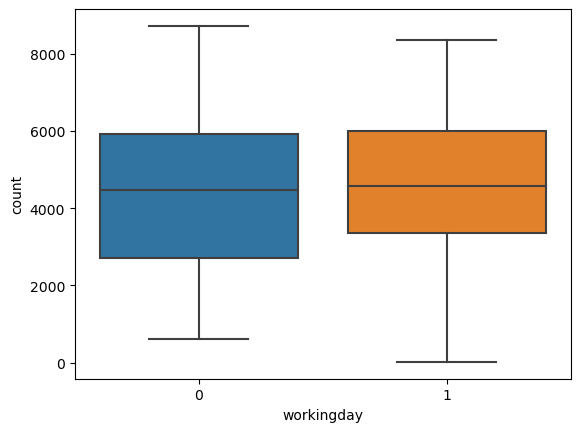

In [238]:
plt.figure(figsize=(25, 10))
for i in ['season','month','weathersit','holiday','weekday','workingday']:
    sns.boxplot(x =i, y = 'count', data = bike_new)
    plt.show()

### 1ST Question: . From your analysis of the categorical variables from the dataset, what could you infer about 
### their effect on the dependent variable?

#### There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘count’) 
#### SEASON:
Spring records lowest counts of bike booking and fall records the highest with a median of over 5000, so Season will be a good predictor for independent variable
#### MONTH:
we get a trand in counts as may, jun, jul, aug, sep and oct has highest medians so it can be a good predictor for independent variable
#### WEATHERSIT:
"clear weathersit" has the highest count of booking with a median close to 5000 and "light rain & snow" records rhe lowest booking count so it will be a good predictor for independent variable
#### HOLIDAY:
Bike demand is less in holidays in comparison to not being holiday.
#### WEEKDAY:
weekday variable shows very similar trends having medians closed to 5000 so variable have some or no influence on the predictor
#### WORKINGDAY:
There is no significant change in bike demand with workign day and non working day.


# Correlation Matrix

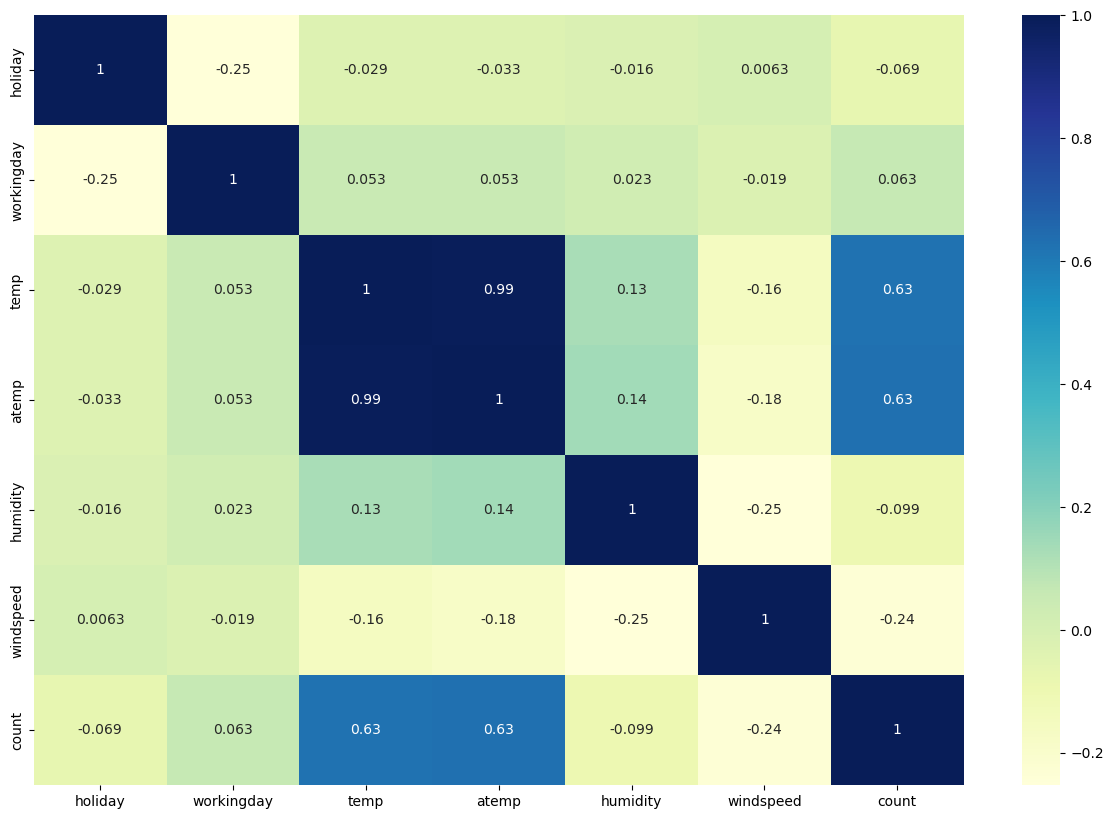

In [239]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 3rd Question: Looking at the pair-plot among the numerical variables, which one has the highest correlation 
### with the target variable?

the numerical variable ‘atemp’ and "temp" has the highest correlation of 0.63 with the target variable ‘count’.

## Data Preparation

In [240]:

months= pd.get_dummies(bike_new['month'],drop_first=True,prefix='month')

seasons = pd.get_dummies(bike_new['season'],drop_first=True,prefix='season')

weather= pd.get_dummies(bike_new['weathersit'],drop_first=True,prefix='weather')

weekdays= pd.get_dummies(bike_new['weekday'],drop_first=True,prefix='day')

years= pd.get_dummies(bike_new['year'],drop_first=True,prefix='year')

### 2nd Question :  Why is it important to use drop_first=True during dummy variable creation? 
#### drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables

In [241]:
bikes = pd.concat([bike_new,months,seasons,weather,weekdays,years], axis = 1)


In [242]:
bikes.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
0,spring,2018,Jan,0,Saturday,0,mist & cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,1,0,0,0,0,0
1,spring,2018,Jan,0,Sunday,0,mist & cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,1,0,0,0,0
2,spring,2018,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,1,0,0,0,0,0,0
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [243]:
bikes.drop(['season','weathersit','weekday','month','year'],axis=1,inplace=True)


In [244]:
bikes.shape

(730, 30)

In [245]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   holiday                    730 non-null    int64  
 1   workingday                 730 non-null    int64  
 2   temp                       730 non-null    float64
 3   atemp                      730 non-null    float64
 4   humidity                   730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   count                      730 non-null    int64  
 7   month_Aug                  730 non-null    uint8  
 8   month_Dec                  730 non-null    uint8  
 9   month_Feb                  730 non-null    uint8  
 10  month_Jan                  730 non-null    uint8  
 11  month_Jul                  730 non-null    uint8  
 12  month_Jun                  730 non-null    uint8  
 13  month_Mar                  730 non-null    uint8  

## Splitting the Data into Training and Testing set 

In [246]:
from sklearn.model_selection import train_test_split
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)


In [247]:
bikes_train.shape

(510, 30)

In [248]:
bikes_test.shape

(219, 30)

### Scaling the Features

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [170]:
vars = ['windspeed','temp','atemp', 'humidity','count']

bikes_train[vars] = scaler.fit_transform(bikes_train[vars])

bikes_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,...,1,0,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,1,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,1,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,...,0,0,1,0,1,0,0,0,0,1


## Dividing into X and Y sets for the model building :

In [171]:
y_train = bikes_train.pop('count')
X_train = bikes_train

In [172]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,month_Aug,month_Dec,month_Feb,month_Jan,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [173]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [174]:
### We will be using Mixed Approach , we will select 15 variable by using RFE and then proceed by manual approach for removing variable one by one based on P-value and VIF

# RFE

In [175]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE using 15 variable


In [176]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [177]:
np.random.seed(0)
rfe = RFE(lm,n_features_to_select=10)            
rfe = rfe.fit(X_train, y_train)

In [178]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_Aug', False, 13),
 ('month_Dec', False, 9),
 ('month_Feb', False, 10),
 ('month_Jan', False, 7),
 ('month_Jul', False, 2),
 ('month_Jun', False, 19),
 ('month_Mar', False, 20),
 ('month_May', False, 12),
 ('month_Nov', False, 8),
 ('month_Oct', False, 16),
 ('month_Sep', False, 4),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', False, 5),
 ('weather_light rain & snow', True, 1),
 ('weather_mist & cloudy', False, 3),
 ('day_Monday', False, 15),
 ('day_Saturday', True, 1),
 ('day_Sunday', True, 1),
 ('day_Thursday', False, 17),
 ('day_Tuesday', False, 14),
 ('day_Wednesday', False, 18),
 ('year_2019', True, 1)]

In [179]:
 col = X_train.columns[rfe.support_]
col   

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'weather_light rain & snow', 'day_Saturday',
       'day_Sunday', 'year_2019'],
      dtype='object')

In [187]:
X_train_rfe = X_train[col]

## Model 1

In [188]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [189]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Mon, 08 May 2023   Prob (F-statistic):          1.40e-174
Time:                        19:25:06   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3308      0.024     13.513      0.000       0.283       0.379
holiday                       0.0313      0.023      1.371      0.171      -0.014       0.076
workingday                    0.1096      0.010     11.125      0.000       0.090       0.129
temp                          0.3897      0.025     15.777      0.000       0.341       0.438
humidity                     -0.2159      0.033     -6.562      0.000      -0.281      -0.151
windspeed                    -0.1986      0.027     -7.248      0.000      -0.252      -0.145
season_spring                -0.1557      0.013    -12.020      0.000      -0.181      -0.130
weather_light rain & snow    -0.2006      0.027     -7.393      0.000      -0.254      -0.147
day_Saturday                  0.1190      0.012      9.756      0.000       0.095       0.143
day_Sunday                    0.0708      0.013      5.606      0.000       0.046       0.096
year_2019                     0.2321      0.009     26.263      0.000       0.215       0.249
==============================================================================
Omnibus:                       48.233   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.896
Skew:                          -0.578   Prob(JB):                     1.83e-20
Kurtosis:                       4.714   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.74e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### VIF

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
8,day_Saturday,inf
9,day_Sunday,inf
3,temp,1.63
6,season_spring,1.62
4,humidity,1.21
5,windspeed,1.14
7,weather_light rain & snow,1.10
10,year_2019,1.03


## Model 2

In [191]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [192]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Mon, 08 May 2023   Prob (F-statistic):          1.40e-174
Time:                        19:26:15   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3308      0.024     13.513      0.000       0.283       0.379
holiday                       0.0313      0.023      1.371      0.171      -0.014       0.076
workingday                    0.1096      0.010     11.125      0.000       0.090       0.129
temp                          0.3897      0.025     15.777      0.000       0.341       0.438
humidity                     -0.2159      0.033     -6.562      0.000      -0.281      -0.151
windspeed                    -0.1986      0.027     -7.248      0.000      -0.252      -0.145
season_spring                -0.1557      0.013    -12.020      0.000      -0.181      -0.130
weather_light rain & snow    -0.2006      0.027     -7.393      0.000      -0.254      -0.147
day_Saturday                  0.1190      0.012      9.756      0.000       0.095       0.143
day_Sunday                    0.0708      0.013      5.606      0.000       0.046       0.096
year_2019                     0.2321      0.009     26.263      0.000       0.215       0.249
==============================================================================
Omnibus:                       48.233   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.896
Skew:                          -0.578   Prob(JB):                     1.83e-20
Kurtosis:                       4.714   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.74e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,32.60
7,day_Saturday,8.04
8,day_Sunday,7.69
0,holiday,2.13
2,temp,1.63
5,season_spring,1.62
3,humidity,1.21
4,windspeed,1.14
6,weather_light rain & snow,1.10
9,year_2019,1.03


## Model 3

In [194]:
# Dropping the 'workingday' variable
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [195]:
X_train_new

,holiday,temp,humidity,windspeed,season_spring,weather_light rain & snow,day_Saturday,day_Sunday,year_2019
653,0,0.509887,0.575354,0.300794,0,0,0,0,1
576,0,0.815169,0.725633,0.264686,0,0,0,0,1
426,0,0.442393,0.640189,0.255342,1,0,1,0,1
728,0,0.245101,0.498067,0.663106,1,0,0,1,1
482,0,0.395666,0.504508,0.188475,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
526,0,0.824514,0.605840,0.355596,0,0,0,0,1
578,0,0.863973,0.679690,0.187140,0,0,0,0,1
53,0,0.202618,0.435939,0.111379,1,0,0,0,0
350,0,0.248216,0.577930,0.431816,0,0,1,0,0


In [196]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Mon, 08 May 2023   Prob (F-statistic):          1.40e-174
Time:                        19:28:26   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4404      0.030     14.540      0.000       0.381       0.500
holiday                      -0.0783      0.028     -2.804      0.005      -0.133      -0.023
temp                          0.3897      0.025     15.777      0.000       0.341       0.438
humidity                     -0.2159      0.033     -6.562      0.000      -0.281      -0.151
windspeed                    -0.1986      0.027     -7.248      0.000      -0.252      -0.145
season_spring                -0.1557      0.013    -12.020      0.000      -0.181      -0.130
weather_light rain & snow    -0.2006      0.027     -7.393      0.000      -0.254      -0.147
day_Saturday                  0.0094      0.012      0.764      0.445      -0.015       0.034
day_Sunday                   -0.0388      0.013     -3.049      0.002      -0.064      -0.014
year_2019                     0.2321      0.009     26.263      0.000       0.215       0.249
==============================================================================
Omnibus:                       48.233   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.896
Skew:                          -0.578   Prob(JB):                     1.83e-20
Kurtosis:                       4.714   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,9.94
1,temp,8.40
3,windspeed,3.91
8,year_2019,2.03
4,season_spring,1.79
6,day_Saturday,1.22
7,day_Sunday,1.21
5,weather_light rain & snow,1.11
0,holiday,1.04


## Model 4

In [198]:
# Dropping the 'humidity' variable
X_train_new = X_train_new.drop(["humidity"], axis = 1)

In [199]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     242.4
Date:                Mon, 08 May 2023   Prob (F-statistic):          7.54e-167
Time:                        19:32:01   Log-Likelihood:                 442.26
No. Observations:                 510   AIC:                            -866.5
Df Residuals:                     501   BIC:                            -828.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2856      0.020     14.441      0.000       0.247       0.324
holiday                      -0.0764      0.029     -2.627      0.009      -0.134      -0.019
temp                          0.3818      0.026     14.864      0.000       0.331       0.432
windspeed                    -0.1509      0.028     -5.485      0.000      -0.205      -0.097
season_spring                -0.1476      0.013    -10.995      0.000      -0.174      -0.121
weather_light rain & snow    -0.2492      0.027     -9.167      0.000      -0.303      -0.196
day_Saturday                  0.0119      0.013      0.930      0.353      -0.013       0.037
day_Sunday                   -0.0403      0.013     -3.048      0.002      -0.066      -0.014
year_2019                     0.2371      0.009     25.875      0.000       0.219       0.255
==============================================================================
Omnibus:                       55.401   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.654
Skew:                          -0.666   Prob(JB):                     1.39e-22
Kurtosis:                       4.721   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.71
1,temp,3.49
7,year_2019,2.02
3,season_spring,1.52
5,day_Saturday,1.21
6,day_Sunday,1.19
4,weather_light rain & snow,1.05
0,holiday,1.04


### 4th Question: How did you validate the assumptions of Linear Regression after building the model on the
### training set?

F-Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 242.4 Prob (F-statistic): 7.54e-167 The F-Statistics value (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

so the equation of best fitted surface according to model 4 will be
##### count=0.2856 - (windspeed × -0.1509)+(temp × 0.3818 )- (holiday × 0.0764) + (year_2019 × 0.2371) - ( weather_light rain & snow × 0.2492)- (season_spring x 0.1476) + (day_Saturday x 0.0119) - (day_Sunday x 0.0403)

## R-squared for training set : 0.795 ( 79.5 %)

## Adj R-squared for training set: 0.791 ( 79.1 %)
###### R-squared = 79.5 which means that 79.5 % of the variance for the target variable ie., 'count' is explained by the predictor variables , and hence we say that it is a good model.

## Residual Analysis of the training set

In [202]:
y_train_count = lm.predict(X_train_lm)

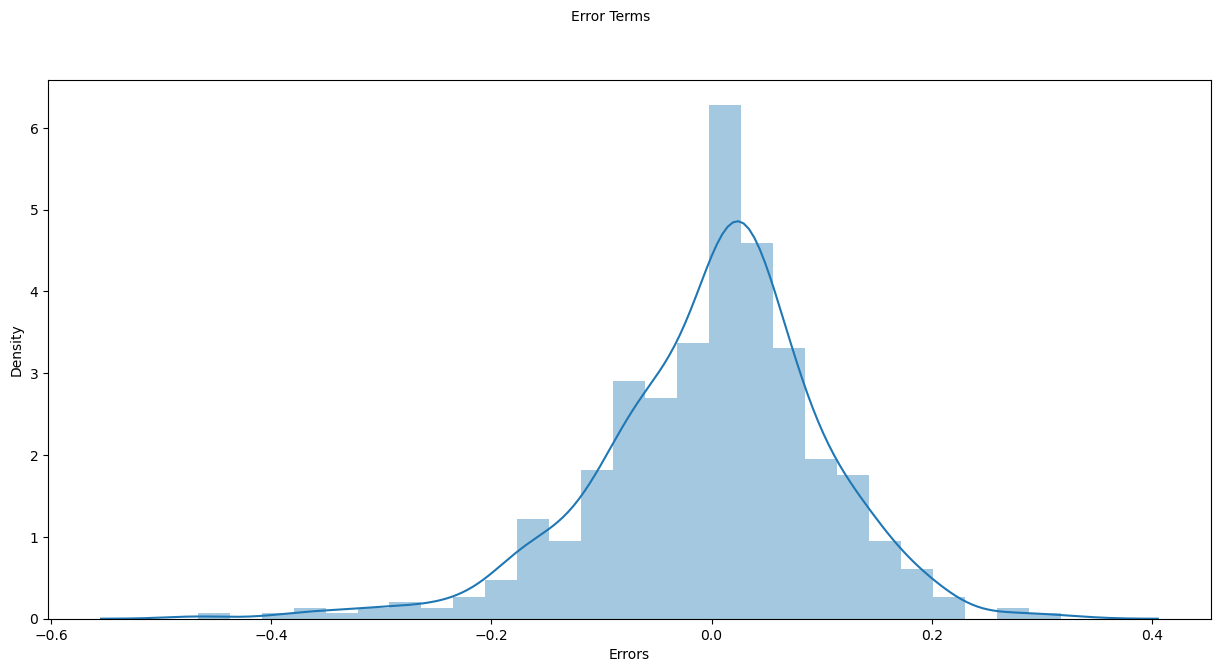

In [206]:
fig = plt.figure(figsize=(15, 7))
sns.distplot((y_train - y_train_count))
fig.suptitle('Error Terms', fontsize = 10)                   
plt.xlabel('Errors', fontsize = 10)
plt.show()

## Making Predictions

In [249]:
vars = ['windspeed' , 'temp','atemp', 'humidity','count']

bikes_test[vars] = scaler.transform(bikes_test[vars])

In [250]:
y_test = bikes_test.pop('count')
X_test = bikes_test

In [251]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [252]:
y_pred = lm.predict(X_test_new)

## Model Evaluation

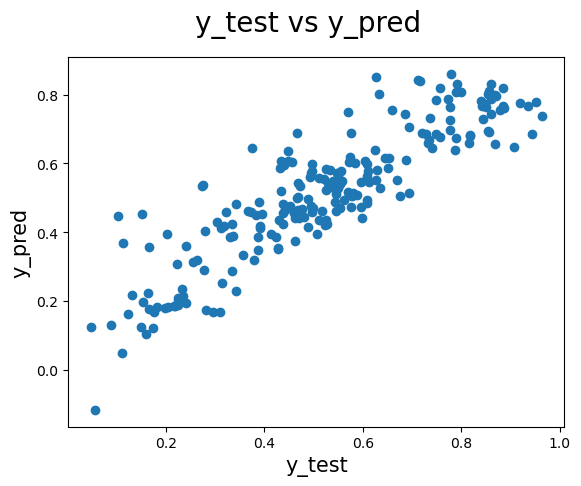

In [253]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('y_pred', fontsize=15)
plt.show()

## R-squared for test set

In [254]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7820699660278272

In [255]:
r2=0.7820699660278272
X_test.shape

(219, 29)

In [256]:
n = X_test.shape[0] # number of rows
p = X_test.shape[1] # number of features
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.748630966106171

### Final Result

##### Train R^2 :0.795 Train Adjusted R^2 :0.791 Test R^2 :0.7820 Test Adjusted R^2 :0.7486 This seems to be a  good model 

### 5th Question:  Based on the final model, which are the top 3 features contributing significantly towards 
### explaining the demand of the shared bikes?

##### Top Three Features according to the model are
1.Temperature 
2.year 
3.weather 